**FINAL PROJECT**

Ok, first we are going to get everything set up by importing the useful libraries (pandas, numpy, and matplot).

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Awesome!

The first metric we will be analyzing is playing fields.

***Playing Fields***

![playing fields](https://www.usu.edu/campusrec/images/ALF%20for%20tv%20small.jpg)

Now, lets read in the data set for playing fields around Pittsburgh and take a look.

In [4]:
playing_fields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")
playing_fields.head()

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Ok everything looks good.

Before we do anything else, why don't we get a better picture of the neighborhoods we are dealing with here.

In [5]:
playing_fields["neighborhood"].unique()

array(['South Side Slopes', 'South Side Flats', 'Lower Lawrenceville',
       'Banksville', 'Allentown', 'Brighton Heights', 'Hazelwood',
       'Lincoln-Lemington-Belmar', 'Windgap', 'Troy Hill',
       'South Oakland', 'Brookline', 'Arlington', 'Mount Washington',
       'Crafton Heights', 'East Hills', 'East Liberty', 'Highland Park',
       'Squirrel Hill South', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Perry South', 'Perry North',
       'Elliott', 'Beechview', 'Morningside', 'Central Lawrenceville',
       'Bedford Dwellings', 'Terrace Village', 'Larimer', 'Beltzhoover',
       'Greenfield', 'Manchester', 'Allegheny Center', 'Central Oakland',
       'Lincoln Place', 'Sheraden', 'Shadyside', 'Spring Garden',
       'Oakwood', 'Stanton Heights', 'Carrick', 'Marshall-Shadeland',
       'Spring Hill-City View', 'West End', 'Polish Hill', 'Westwood',
       'Squirrel Hill North', 'Homewood South'], dtype=object)

That gives us the names of the individual neighborhoods, but what about knowing exactly how many we are working with.

We can easily check this with a small change to the previous code

In [18]:
playing_fields["neighborhood"].nunique()

51

Ok, how about how many playing fields we need to consider.

In [7]:
len(playing_fields)

113

That's actually pretty good, especially considering that a significant amount of the data set covers urban regions, which makes it somewhat more difficult to find the land needed for playing fields.

Now, lets breakdown the data set to analyze how the playing fields are distributed by neighborhood

In [8]:
playing_fields["neighborhood"].value_counts()

Brighton Heights            7
Brookline                   6
South Side Slopes           6
Carrick                     5
Squirrel Hill South         5
Lower Lawrenceville         4
Hazelwood                   4
Highland Park               4
Troy Hill                   3
Beltzhoover                 3
Morningside                 3
Mount Washington            3
Shadyside                   3
Sheraden                    3
Beechview                   3
Banksville                  2
Westwood                    2
Spring Hill-City View       2
Manchester                  2
Crafton Heights             2
Central Lawrenceville       2
South Side Flats            2
Bedford Dwellings           2
South Oakland               2
Regent Square               2
Allegheny Center            2
Perry North                 2
Lincoln-Lemington-Belmar    2
Greenfield                  2
Elliott                     2
Terrace Village             1
Fineview                    1
Upper Lawrenceville         1
Central Oa

This gives us a solid idea of the distribution of playing fields across the various neighborhoods in Pittsburgh, but we can create a visual representation as well to add some more insight.

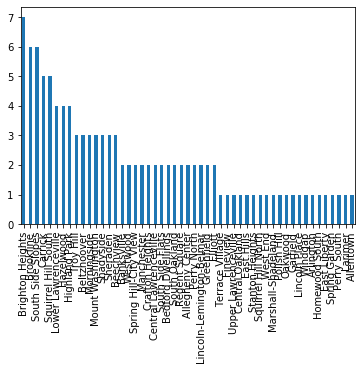

In [9]:
playing_fields["neighborhood"].value_counts().plot(kind="bar")

From both representations of the data, we see that there isn't a ton of variability in the amount of playing fields per neighborhood; however, there are definitely a few neighborhoods that stand out at the top, for instance Brighton Heights leading the pack with seven.

Lets take a closer look at the top five.

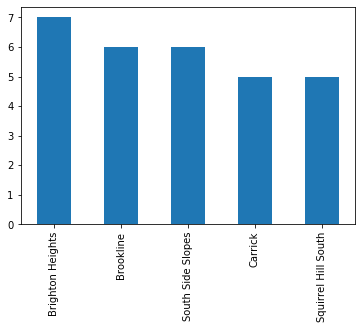

In [10]:
playing_fields["neighborhood"].value_counts().head().plot(kind="bar")

Perfect, we have our top five comprised of Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, and Carrick. We could simply end our investigation here, but the data has a few quirks that we should consider.

As we look through the data set, it seems designed to consider mainly baseball fields, with individual field locations classified by the shape(s)/usage of the field(s). Lets examine what types of fields we are working with. 

In [11]:
playing_fields["field_usage"].unique()

array(['Diamond Only', 'Diamond and Rectangular', 'Rectangular Only'],
      dtype=object)

So, there are fields used only for the diamond, rectangular fields that lack a diamond, and locations that are multi-purpose, offering both a rectangular field and a diamond. For these multi-purpose locations, the data set does not specify whether their mixed usage is because there are multiple fields at the location or that the singular field has all of the equipment and lines to be used for all kinds of activities. We will be assuming the later, that each piece of data corresponds to one field only, in order to avoid the complexities that accompany the other option.  

Something else to consider is that the data set's design has left it impossible to gauge the size of rectangular fields, as the size of the fields is only indicated by the distance from home plate to left, center, and right field respectively. Obviously, this complicates things as their is no way to measure exactly how much land each neighborhood has dedicated to playing fields.

Furthermore, the data set also contains a "has_lights" field that stipulates whether or not the field has lights, giving us another factor to consider. Playing fields with lights are arguably more valuable than those without, as they can be used for greater periods of time. 

So, how are we going to take these factors into account. By default, we will give all playing fields a value of 1. Fields that are multi-purpose will recieve an additional point of value on top of that. We will be giving fields with lights an additional .25 as well to account for the additional use they offer that fields without lights lack.  

So, lets apply this to the data by generating two subsets of the original data that encompass multi-purpose fields and fields with lights

In [12]:
both_options = playing_fields["field_usage"] == "Diamond and Rectangular"
multi_purpose = playing_fields[both_options]
multi_purpose["neighborhood"].value_counts()

Morningside              3
Central Lawrenceville    2
Westwood                 2
Highland Park            2
Brookline                2
Sheraden                 1
Terrace Village          1
Allegheny Center         1
South Side Flats         1
Lower Lawrenceville      1
Homewood South           1
Polish Hill              1
West End                 1
Beltzhoover              1
Elliott                  1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that are multi-purpose, meaning they have both a diamond and a rectangular field.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

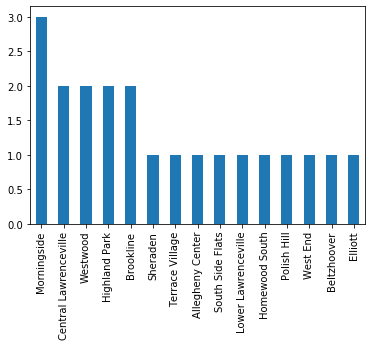

In [13]:
multi_purpose["neighborhood"].value_counts().plot(kind="bar")

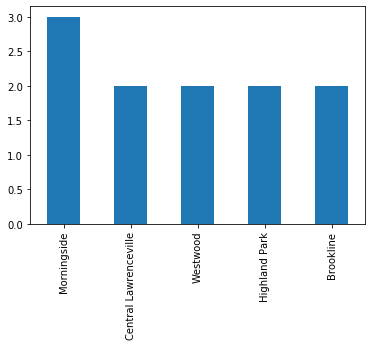

In [14]:
multi_purpose["neighborhood"].value_counts().head().plot(kind="bar")

In [15]:
has_lights = playing_fields["has_lights"] == "t"
fields_with_lights = playing_fields[has_lights]
fields_with_lights["neighborhood"].value_counts()

South Side Slopes           4
Carrick                     3
Mount Washington            3
Brookline                   3
Troy Hill                   3
Morningside                 3
Beechview                   2
Elliott                     2
Crafton Heights             2
Westwood                    2
Lower Lawrenceville         2
Bedford Dwellings           2
Greenfield                  2
Squirrel Hill South         2
Central Lawrenceville       2
Manchester                  1
Perry South                 1
Windgap                     1
Beltzhoover                 1
South Oakland               1
Fineview                    1
Sheraden                    1
Shadyside                   1
Lincoln-Lemington-Belmar    1
Terrace Village             1
Perry North                 1
Banksville                  1
Spring Hill-City View       1
Polish Hill                 1
Homewood South              1
Garfield                    1
Hazelwood                   1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that have lights.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

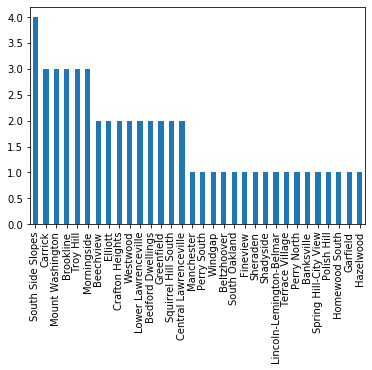

In [16]:
fields_with_lights["neighborhood"].value_counts().plot(kind="bar")

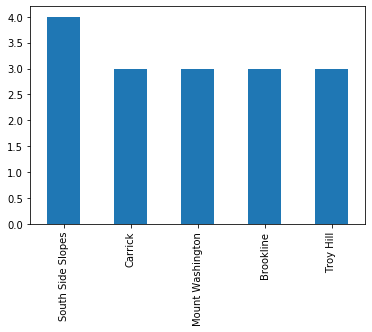

In [19]:
fields_with_lights["neighborhood"].value_counts().head().plot(kind="bar")